<a href="https://colab.research.google.com/github/vysf/stacking-chart-for-electrical-resistivity-method/blob/master/pole_dipole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
def pole_dipole(x1,x2,a):
  elektroda = np.arange(x1,x2+1,a)
  # print(elektroda)
  A, M, N = [], [], []
  X = []
  Y = []
  n = 1
  while True:
    for i in range(len(elektroda)):
      num = i+(1+n)
      if num >= len(elektroda):
        n += 1
        break
      #print (num,i,n)
      A.append(elektroda[i])
      M.append(elektroda[i+n])
      N.append(elektroda[i+(1+n)])
      X.append(A[-1]+(M[-1] - A[-1])/2)
      Y.append(n)
      #print(num,i,n)
    if i == 0:
      break
  return np.array(A), np.array(M), np.array(N), np.array(X), np.array(Y), elektroda

x1 = 0
x2 = 10
a = 1

A,M,N,X,Y, elektroda = pole_dipole(x1,x2,a)

In [ ]:
d = {'A': A, 'M': M, 'N': N,'X': X, 'Y': Y}
df = pd.DataFrame(data=d)
# get XY where A == x1
# get XY where B == x2
first = df[df['A'] == x1]
last = df[df['N'] == x2]
df

,A,M,N,X,Y
0,0,1,2,0.5,1
1,1,2,3,1.5,1
2,2,3,4,2.5,1
3,3,4,5,3.5,1
4,4,5,6,4.5,1
5,5,6,7,5.5,1
6,6,7,8,6.5,1
7,7,8,9,7.5,1
8,8,9,10,8.5,1
9,0,2,3,1.0,2


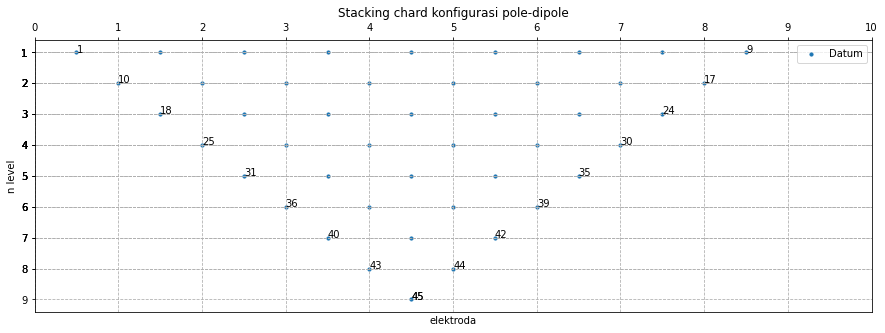

In [ ]:
# coordinates = [(f'{X+1}',1,2), ('b',3,4), ('c',5,6)]
plt.figure(figsize=(15,5))
plt.scatter(X, Y, label='Datum', s=10)

for txt, x, y in zip(first.index, first['X'].values, first['Y'].values):
  plt.annotate(f'{txt+1}', (x, y))
for txt, x, y in zip(last.index, last['X'].values, last['Y'].values):
  plt.annotate(f'{txt+1}', (x, y))
plt.title('Stacking chard konfigurasi pole-dipole')
plt.xlabel('elektroda')
plt.ylabel('n level')
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(elektroda)
plt.yticks(Y)
plt.grid(linestyle='--')
plt.legend()